# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
""" Load pickled data """
import pickle
import csv

print('Loading dataset...')

training_file = './traffic-signs-data/train.p'
validation_file = './traffic-signs-data/valid.p'
testing_file = './traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

""" Build a dictionary for sign name classes """
sign_name_file = './signnames.csv'
sign_names = {}
with open(sign_name_file, mode='r') as f:
    reader = csv.reader(f)
    for row in reader:
        if row[0].isdigit():
            sign_names[int(row[0])] = row[1]

""" Build data sets """
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']
print('Done.')

Loading dataset...
Done.


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

print('Summarizing dataset...')

# Number of training examples
n_train = len(X_train)

# Number of validation examples
n_validation = len(X_valid)

# Number of testing examples.
n_test = len(X_test)

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = len(set((y_train)))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Summarizing dataset...
Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

Visualizing dataset...


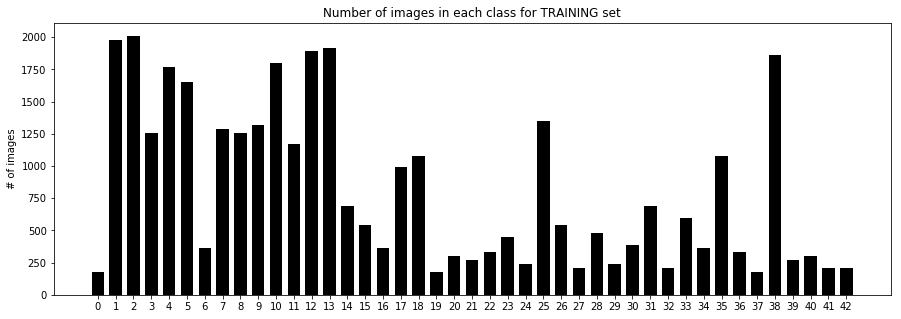

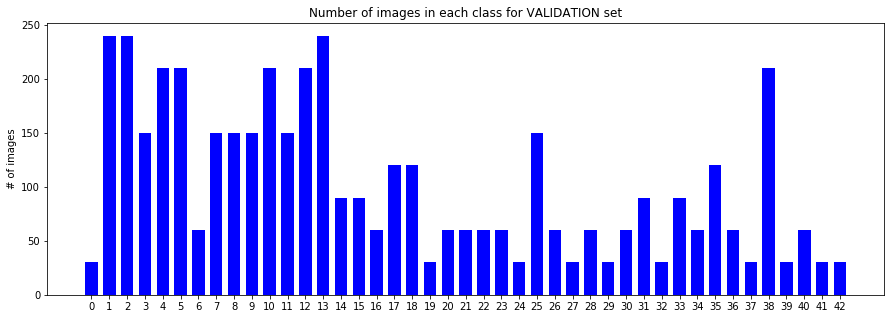

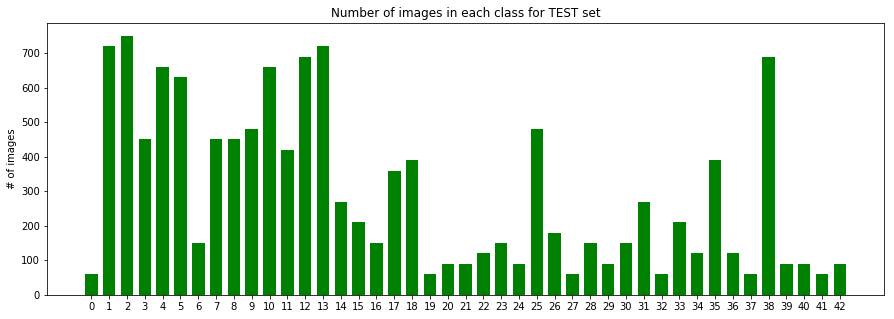

0 : Speed limit (20km/h)
1 : Speed limit (30km/h)
2 : Speed limit (50km/h)
3 : Speed limit (60km/h)
4 : Speed limit (70km/h)
5 : Speed limit (80km/h)
6 : End of speed limit (80km/h)
7 : Speed limit (100km/h)
8 : Speed limit (120km/h)
9 : No passing
10 : No passing for vehicles over 3.5 metric tons
11 : Right-of-way at the next intersection
12 : Priority road
13 : Yield
14 : Stop
15 : No vehicles
16 : Vehicles over 3.5 metric tons prohibited
17 : No entry
18 : General caution
19 : Dangerous curve to the left
20 : Dangerous curve to the right
21 : Double curve
22 : Bumpy road
23 : Slippery road
24 : Road narrows on the right
25 : Road work
26 : Traffic signals
27 : Pedestrians
28 : Children crossing
29 : Bicycles crossing
30 : Beware of ice/snow
31 : Wild animals crossing
32 : End of all speed and passing limits
33 : Turn right ahead
34 : Turn left ahead
35 : Ahead only
36 : Go straight or right
37 : Go straight or left
38 : Keep right
39 : Keep left
40 : Roundabout mandatory
41 : End of

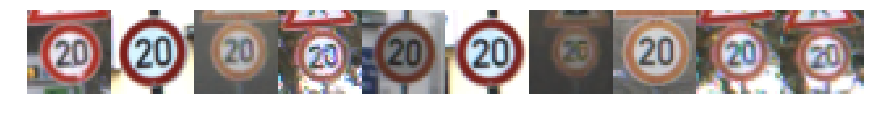

1: Speed limit (30km/h)


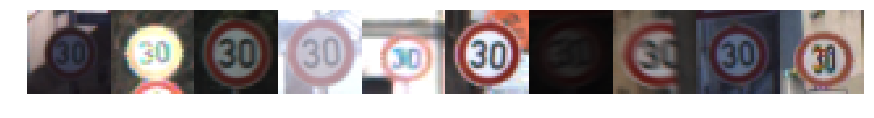

2: Speed limit (50km/h)


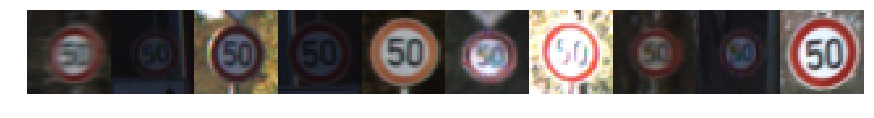

3: Speed limit (60km/h)


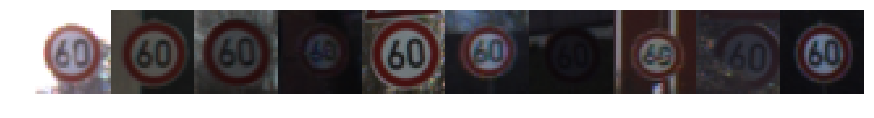

4: Speed limit (70km/h)


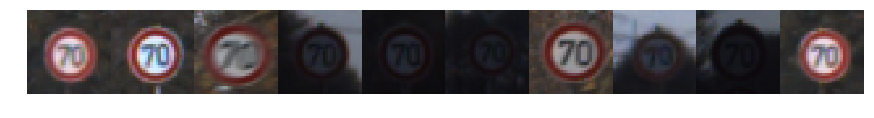

5: Speed limit (80km/h)


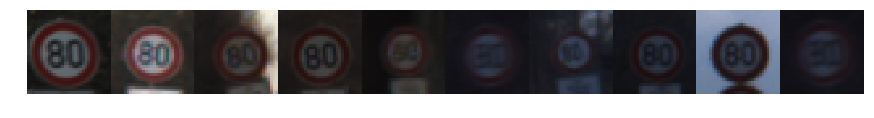

6: End of speed limit (80km/h)


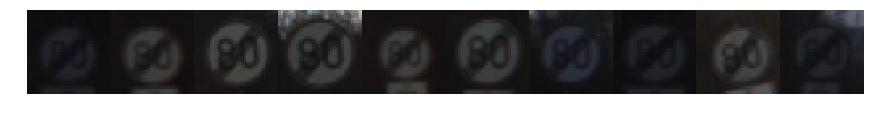

7: Speed limit (100km/h)


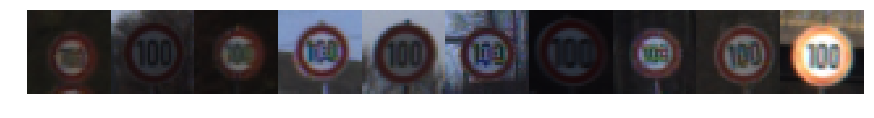

8: Speed limit (120km/h)


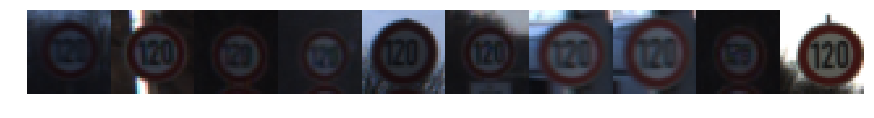

9: No passing


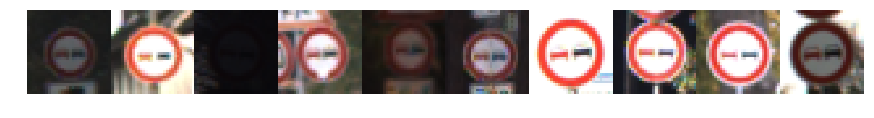

10: No passing for vehicles over 3.5 metric tons


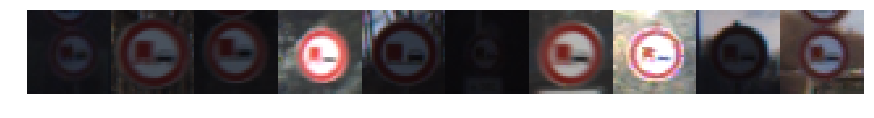

11: Right-of-way at the next intersection


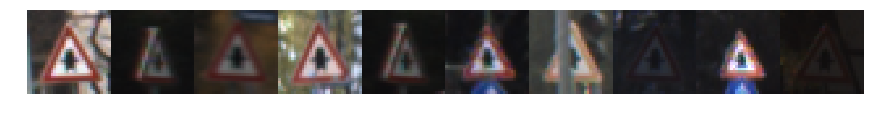

12: Priority road


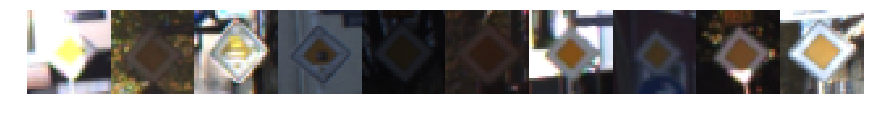

13: Yield


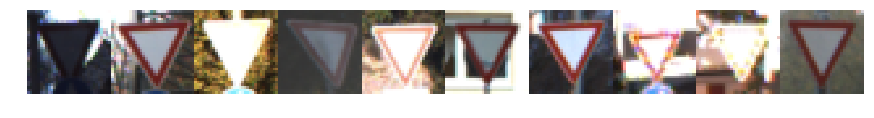

14: Stop


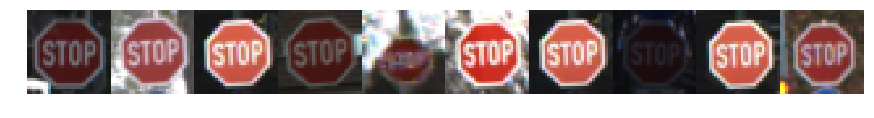

15: No vehicles


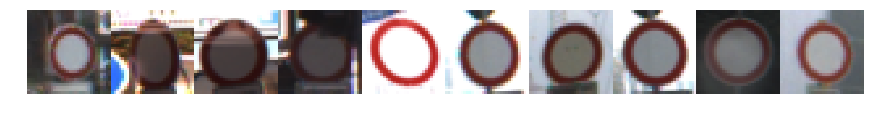

16: Vehicles over 3.5 metric tons prohibited


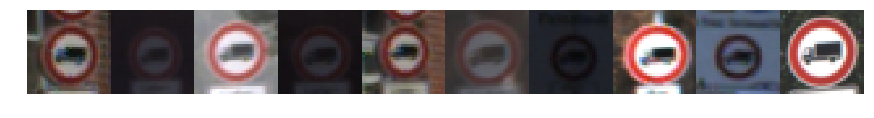

17: No entry


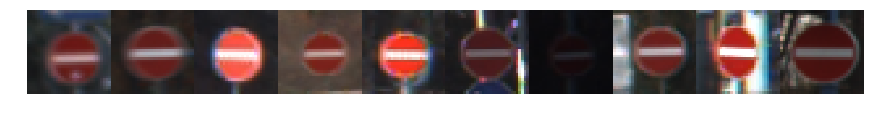

18: General caution


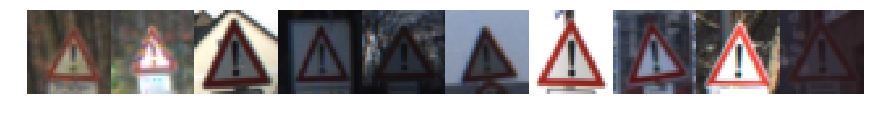

19: Dangerous curve to the left


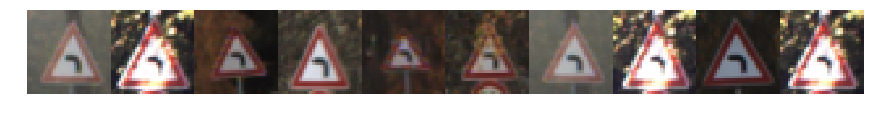

20: Dangerous curve to the right


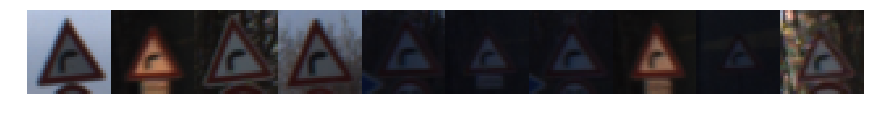

21: Double curve


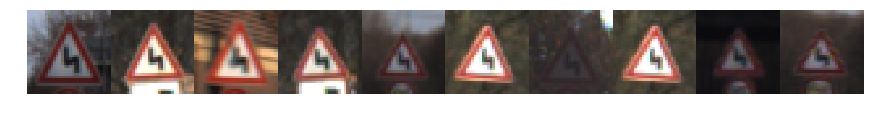

22: Bumpy road


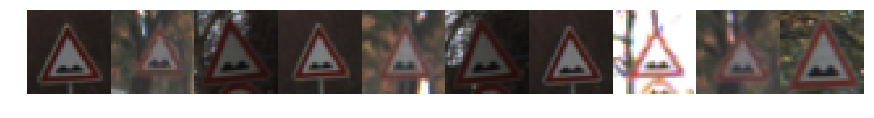

23: Slippery road


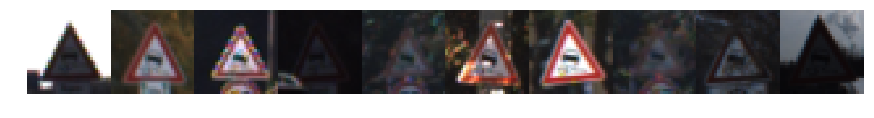

24: Road narrows on the right


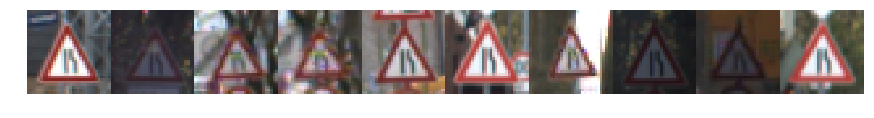

25: Road work


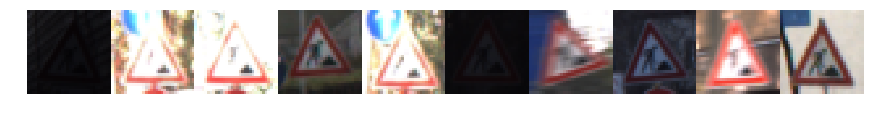

26: Traffic signals


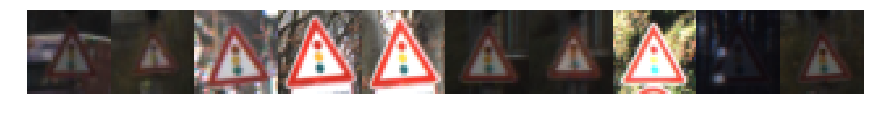

27: Pedestrians


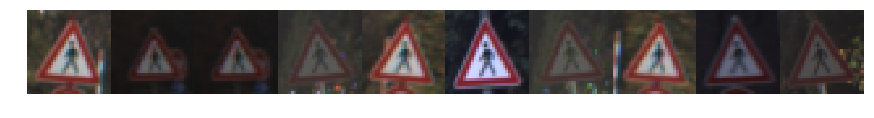

28: Children crossing


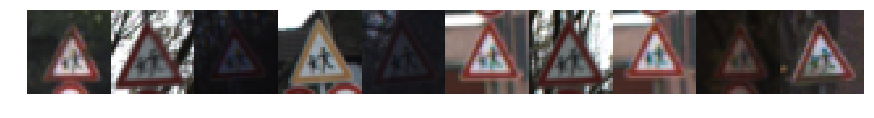

29: Bicycles crossing


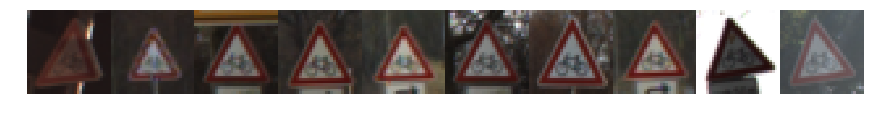

30: Beware of ice/snow


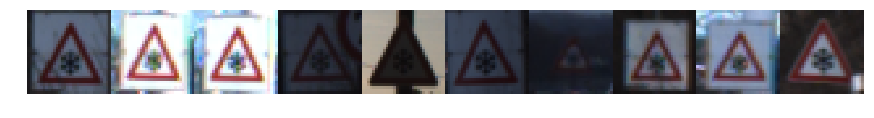

31: Wild animals crossing


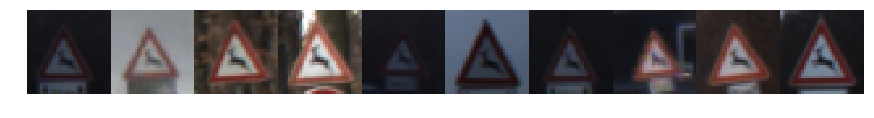

32: End of all speed and passing limits


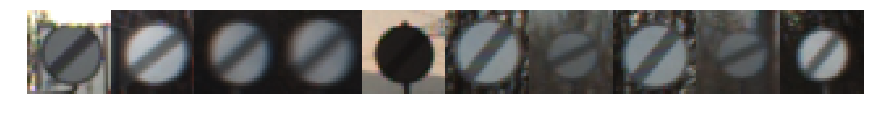

33: Turn right ahead


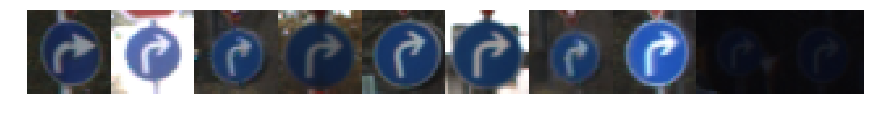

34: Turn left ahead


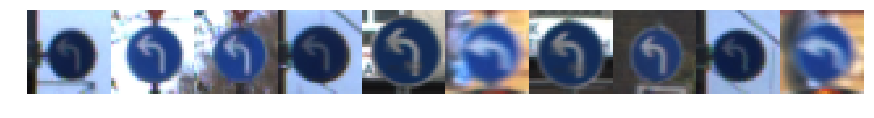

35: Ahead only


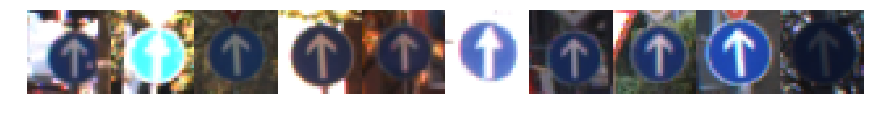

36: Go straight or right


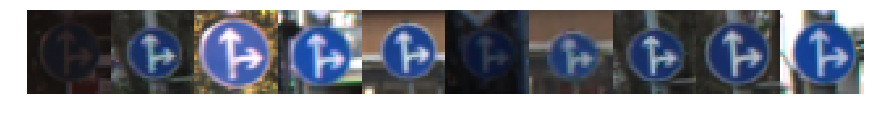

37: Go straight or left


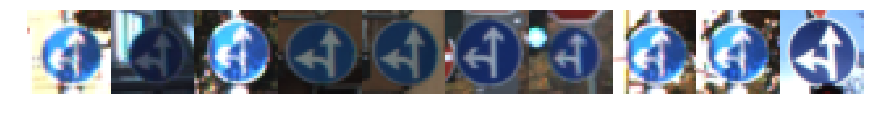

38: Keep right


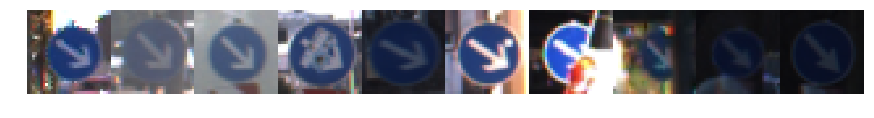

39: Keep left


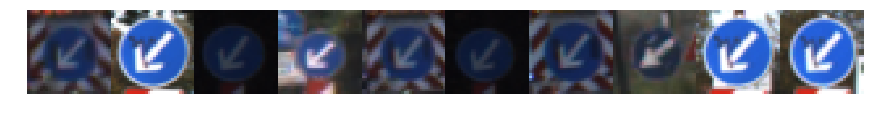

40: Roundabout mandatory


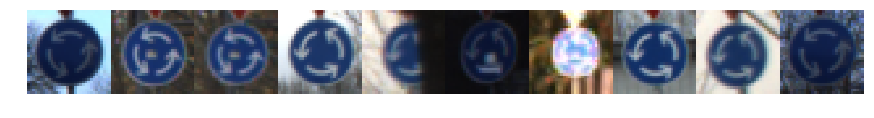

41: End of no passing


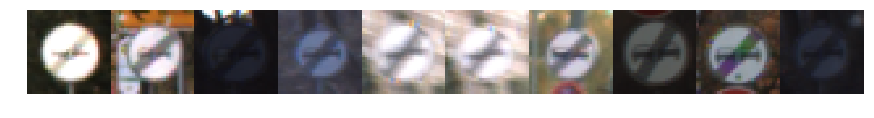

42: End of no passing by vehicles over 3.5 metric tons


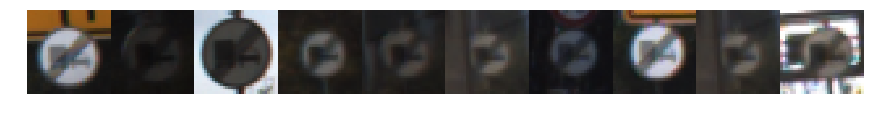

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import numpy as np
import matplotlib.pyplot as plt
import random

# Visualizations will be shown in the notebook.
%matplotlib inline

print('Visualizing dataset...')

""" Make bar graph of sign class frequencies in training set """
fig, ax1 = plt.subplots(figsize=(15, 5))
bincount_train = np.bincount(y_train)
x_pos = np.arange(n_classes)
ax1.bar(x_pos, bincount_train, 0.7, color='k')
ax1.set_title('Number of images in each class for TRAINING set')
ax1.set_xticks(np.arange(0, n_classes))
ax1.set_ylabel('# of images')
plt.show()

""" Make bar graph of sign class frequencies in validation set """
fig, ax2 = plt.subplots(figsize=(15, 5))
bincount_valid = np.bincount(y_valid)
x_pos = np.arange(n_classes)
ax2.bar(x_pos, bincount_valid, 0.7, color='b')
ax2.set_title('Number of images in each class for VALIDATION set')
ax2.set_xticks(np.arange(0, n_classes))
ax2.set_ylabel('# of images')
plt.show()

""" Make bar graph of sign class frequencies in test set """
fig, ax3 = plt.subplots(figsize=(15, 5))
bincount_test = np.bincount(y_test)
x_pos = np.arange(n_classes)
ax3.bar(x_pos, bincount_test, 0.7, color='g')
ax3.set_title('Number of images in each class for TEST set')
ax3.set_xticks(np.arange(0, n_classes))
ax3.set_ylabel('# of images')
plt.show()

""" Print out dictionary of sign classes for reference """
for key, value in sorted(sign_names.items()):
    print('{} : {}'.format(key, value))
print()

""" Show multiple example images of all sign classes """
def get_example_image_idx(img_class, num):
    idx = np.where(y_train == img_class)
    img_idx = []
    for i in range(num):
        img_idx.append(random.choice(idx[0]))
    return img_idx
    
def plot_example_images(img_idx, image_data, colormap=None):
    num = len(img_idx)
    fig, ax = plt.subplots(1, num, figsize=(15, 10))
    for i in range(num):
        image = image_data[img_idx[i]]
        if colormap:
            ax[i].imshow(image, cmap = colormap)
        else:
            ax[i].imshow(image)                
        ax[i].axis('off')
    plt.subplots_adjust(wspace = 0)
    plt.show()

print('Examples of each sign class\n')
for i in range(n_classes):
    print('{}: {}'.format(i, sign_names[i]))
    ex_idx = get_example_image_idx(i, 10)
    plot_example_images(ex_idx, X_train)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

Normalize: 100%|██████████| 12630/12630 [00:00<00:00, 21363.54it/s]


Example of pre-processing:

Original images


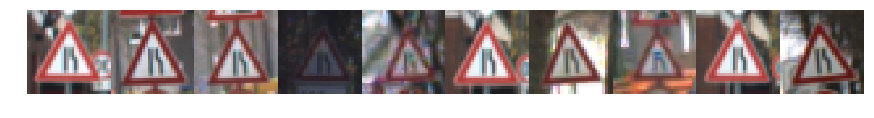

Adaptive Histogram Equalization with HLS Color


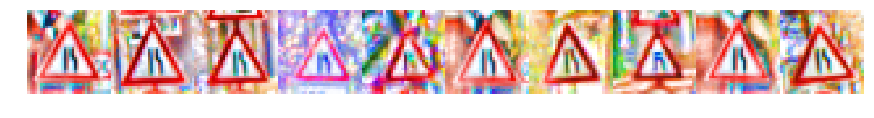

Normalized [0, 255] -> [-0.5, 0.5]


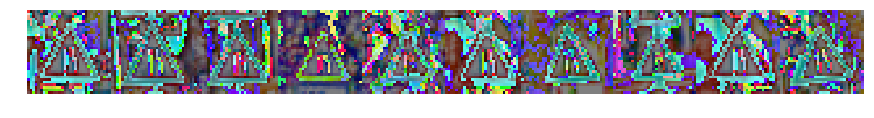

In [9]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

import cv2
from tqdm import tqdm

def normalize_image(image_data):
    """
    This function re-scales RGB images from [0, 255] to [-0.5, 0.5] by linear interpolation
    """
    image_norm = np.empty(shape=image_data.shape, dtype=np.float32)
    a, b = -0.5, 0.5
    x_min, x_max = 0, 255
    for idx_img in tqdm(range(image_data.shape[0]), desc='Normalize'):
        image_norm[idx_img] = ((image_data[idx_img] - x_min)/(x_max - x_min)*(b - a) + a)
    return image_norm


def adaptive_hist_HLS(image_data):
    """
    This function applies Contrast Limited Adaptive Histogram Equalization (CLAHE)
    to the HLS Lightness and Saturation channels of the images to improve visibility.
    The Hue channel is not modified to keep original coloring.
    See http://docs.opencv.org/3.1.0/d5/daf/tutorial_py_histogram_equalization.html
    """
    image_histcolor = np.empty(shape=image_data.shape, dtype=np.uint8)
    for idx_img in tqdm(range(image_data.shape[0]), desc='Equalize'):
        image_wk = np.copy(image_data[idx_img])
        image_wk = cv2.cvtColor(image_wk, cv2.COLOR_RGB2HLS)
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(5,5))
        image_wk[:,:,1] = clahe.apply(image_wk[:,:,1])
        image_wk[:,:,2] = clahe.apply(image_wk[:,:,2])
        image_wk = cv2.cvtColor(image_wk, cv2.COLOR_HLS2RGB)
        image_histcolor[idx_img] = image_wk
    return image_histcolor


""" Pre-process images with adaptive histogram equalization and normalization """
X_train_hist = adaptive_hist_HLS(X_train)
X_train_hist_norm = normalize_image(X_train_hist)

X_valid_hist = adaptive_hist_HLS(X_valid)
X_valid_hist_norm = normalize_image(X_valid_hist)

X_test_hist = adaptive_hist_HLS(X_test)
X_test_hist_norm = normalize_image(X_test_hist)


""" Visualize example results """
print('Example of pre-processing:\n')
ex_idx = get_example_image_idx(24, 10) # 10 examples of sign class 0 

print('Original images')
plot_example_images(ex_idx, X_train)

print('Adaptive Histogram Equalization with HLS Color')
plot_example_images(ex_idx, X_train_hist)

print('Normalized [0, 255] -> [-0.5, 0.5]')
plot_example_images(ex_idx, X_train_hist_norm)

### Model Architecture

In [10]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf

def conv2d_relu(input_net, patch_size, input_depth, output_depth, strides=1, padding='VALID', mu=0, sigma=0.1):
    """
    2D Convolution Layer with truncated normal distribution weights and biases and RELU activation
    """
    W = tf.Variable(tf.truncated_normal([patch_size, patch_size, input_depth, output_depth], mean=mu, stddev=sigma))
    b = tf.Variable(tf.truncated_normal([output_depth], mean=mu, stddev=sigma))
    conv = tf.nn.conv2d(input_net, W, strides=[1, strides, strides, 1], padding=padding)
    conv = tf.nn.bias_add(conv, b)
    conv = tf.nn.relu(conv)
    return conv


def maxpool(input_net, k, padding='VALID'):
    """
    Max pooling layer with kernel size (k x k)
    """
    pool = tf.nn.max_pool(input_net, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding=padding)
    return pool
    
    
def fcl_relu(input_net, input_depth, output_depth, mu=0, sigma=0.1):
    """
    Fully Connected Layer with truncated normal distribution weights and biases and RELU activation
    """
    W = tf.Variable(tf.truncated_normal([input_depth, output_depth], mean=mu, stddev=sigma))
    b = tf.Variable(tf.truncated_normal([output_depth], mean=mu, stddev=sigma))
    fcl = tf.add(tf.matmul(input_net, W), b)
    fcl = tf.nn.relu(fcl)
    return fcl


def DuffNet(x, keep_prob):
    """
    Architecture based on LeNet-5 with increased feature maps and added multi-scale
    connection for 1st CNN+Pool layer.  Dropout is applied to the fully connected
    layers to reduce overfitting.  Learning rate decay is applied to stabilize learning
    accuracy curves.

    Layer 1: CNN1
                5x5 Convolution with RELU activation
                Input = 32 x 32 x 3
                Output = 28 x 28 x 16

    Layer 2: POOL1
                2x2 Max Pooling
                Input = 28 x 28 x 16
                Output = 14 x 14 x 16

    Layer 3: CNN2
                5x5 Convolution with RELU activation
                Input = 14 x 14 x 16
                Output = 10 x 10 x 32

    Layer 4: POOL2
                2x2 Max Pooling
                Input = 10 x 10 x 32
                Output = 5 x 5 x 32

    Layer 5: FCL1
                Fully Connected Layer with Multi-Scale connections and RELU activation
                Input = (14 x 14 x 16) + (5 x 5 x 32) = 3136 + 800 = 3936
                Output = 1024
                Dropout with 50% keep probability

    Layer 6: FCL2
                Fully Connected Layer with RELU activation
                Input = 1024
                Output = 1024
                Dropout with 50% keep probability
                
    Layer 7: FCL3
                Fully Connected Layer with RELU activation
                Input = 1024
                Output = 43
    """
    
    # Global access CNN layers for later visualization
    global conv1
    global conv2

    # CNN1: Input = 32x32x3. Output = 28x28x16. Activation = RELU.
    conv1 = conv2d_relu(input_net = x, patch_size = 5, input_depth = 3, output_depth = 16)
    print('conv1: {}'.format(conv1))

    # POOL1: Input = 28x28x16. Output = 14x14x16.
    pool1 = maxpool(conv1, 2)
    print('pool1: {}'.format(pool1))

    # CNN2: Input = 14x14x16. Output = 10x10x32. Activation = RELU.
    conv2 = conv2d_relu(input_net = pool1, patch_size = 5, input_depth = 16, output_depth = 32)
    print('conv2: {}'.format(conv2))

    # POOL2: Input = 10x10x32. Output = 5x5x32.
    pool2 = maxpool(conv2, 2)
    print('pool2: {}'.format(pool2))
   
    # Flatten POOL1: Input = 14x14x16. Output = 3136.
    flat_pool1 = tf.contrib.layers.flatten(pool1)
    print('flat_pool1: {}'.format(flat_pool1))

    # Flatten POOL2: Input = 5x5x32. Output = 800.
    flat_pool2 = tf.contrib.layers.flatten(pool2)
    print('flat_pool2: {}'.format(flat_pool2))
    
    # Combine POOL1+POOL2: Input = 3136+800. Output = 3936.
    flat = tf.concat(1, [flat_pool1, flat_pool2])
    print('flat: {}'.format(flat))
    
    # FCL1: Input = 3936. Output = 1024.
    fcl1 = fcl_relu(input_net = flat, input_depth = 3936, output_depth = 1024)
    print('fcl1: {}'.format(fcl1))

    # Dropout
    fcl1_drop = tf.nn.dropout(fcl1, keep_prob)
    print('fcl1_drop: {}'.format(fcl1_drop))
  
    # FCL2: Input = 1024. Output = 1024
    fcl2 = fcl_relu(input_net = fcl1_drop, input_depth = 1024, output_depth = 1024)
    print('fcl2: {}'.format(fcl2))
    
    # Dropout
    fcl2_drop = tf.nn.dropout(fcl2, keep_prob)
    print('fcl2_drop: {}'.format(fcl2_drop))
    
    #FCL3: Input = 1024. Output = 43.
    fcl3 = fcl_relu(input_net = fcl2_drop, input_depth = 1024, output_depth = n_classes)
    print('fcl3: {}'.format(fcl3))

    logits = fcl3
    return logits


""" Features and Labels """
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, n_classes)

print("Model architecture defined.")

Model architecture defined.


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

conv1: Tensor("Relu:0", shape=(?, 28, 28, 16), dtype=float32)
pool1: Tensor("MaxPool:0", shape=(?, 14, 14, 16), dtype=float32)
conv2: Tensor("Relu_1:0", shape=(?, 10, 10, 32), dtype=float32)
pool2: Tensor("MaxPool_1:0", shape=(?, 5, 5, 32), dtype=float32)
flat_pool1: Tensor("Flatten/Reshape:0", shape=(?, 3136), dtype=float32)
flat_pool2: Tensor("Flatten_1/Reshape:0", shape=(?, 800), dtype=float32)
flat: Tensor("concat:0", shape=(?, 3936), dtype=float32)
fcl1: Tensor("Relu_2:0", shape=(?, 1024), dtype=float32)
fcl1_drop: Tensor("dropout/mul:0", shape=(?, 1024), dtype=float32)
fcl2: Tensor("Relu_3:0", shape=(?, 1024), dtype=float32)
fcl2_drop: Tensor("dropout_1/mul:0", shape=(?, 1024), dtype=float32)
fcl3: Tensor("Relu_4:0", shape=(?, 43), dtype=float32)


Epoch  1/50: 100%|██████████| 136/136 [00:09<00:00, 21.48batches/s]


Learning Rate = 0.00094600
Training Accuracy = 64.108%
Validation Accuracy = 55.329%


Epoch  2/50: 100%|██████████| 136/136 [00:08<00:00, 24.71batches/s]


Learning Rate = 0.00089491
Training Accuracy = 82.267%
Validation Accuracy = 75.420%


Epoch  3/50: 100%|██████████| 136/136 [00:08<00:00, 24.80batches/s]


Learning Rate = 0.00084658
Training Accuracy = 88.833%
Validation Accuracy = 83.333%


Epoch  4/50: 100%|██████████| 136/136 [00:08<00:00, 24.34batches/s]


Learning Rate = 0.00080086
Training Accuracy = 92.500%
Validation Accuracy = 86.213%


Epoch  5/50: 100%|██████████| 136/136 [00:08<00:00, 24.27batches/s]


Learning Rate = 0.00075761
Training Accuracy = 95.210%
Validation Accuracy = 88.617%


Epoch  6/50: 100%|██████████| 136/136 [00:08<00:00, 24.24batches/s]


Learning Rate = 0.00071669
Training Accuracy = 97.267%
Validation Accuracy = 91.270%


Epoch  7/50: 100%|██████████| 136/136 [00:08<00:00, 23.84batches/s]


Learning Rate = 0.00067799
Training Accuracy = 98.922%
Validation Accuracy = 93.379%


Epoch  8/50: 100%|██████████| 136/136 [00:08<00:00, 24.24batches/s]


Learning Rate = 0.00064137
Training Accuracy = 99.026%
Validation Accuracy = 93.469%


Epoch  9/50: 100%|██████████| 136/136 [00:08<00:00, 23.97batches/s]


Learning Rate = 0.00060674
Training Accuracy = 99.083%
Validation Accuracy = 93.492%


Epoch 10/50: 100%|██████████| 136/136 [00:08<00:00, 24.12batches/s]


Learning Rate = 0.00057397
Training Accuracy = 99.144%
Validation Accuracy = 94.875%


Epoch 11/50: 100%|██████████| 136/136 [00:08<00:00, 24.28batches/s]


Learning Rate = 0.00054297
Training Accuracy = 99.184%
Validation Accuracy = 94.308%


Epoch 12/50: 100%|██████████| 136/136 [00:08<00:00, 24.29batches/s]


Learning Rate = 0.00051365
Training Accuracy = 99.181%
Validation Accuracy = 94.467%


Epoch 13/50: 100%|██████████| 136/136 [00:08<00:00, 24.38batches/s]


Learning Rate = 0.00048591
Training Accuracy = 99.193%
Validation Accuracy = 94.218%


Epoch 14/50: 100%|██████████| 136/136 [00:08<00:00, 24.45batches/s]


Learning Rate = 0.00045967
Training Accuracy = 99.193%
Validation Accuracy = 94.535%


Epoch 15/50: 100%|██████████| 136/136 [00:08<00:00, 24.51batches/s]


Learning Rate = 0.00043484
Training Accuracy = 99.195%
Validation Accuracy = 94.580%


Epoch 16/50: 100%|██████████| 136/136 [00:08<00:00, 24.75batches/s]


Learning Rate = 0.00041136
Training Accuracy = 99.201%
Validation Accuracy = 94.853%


Epoch 17/50: 100%|██████████| 136/136 [00:08<00:00, 24.66batches/s]


Learning Rate = 0.00038914
Training Accuracy = 99.204%
Validation Accuracy = 94.422%


Epoch 18/50: 100%|██████████| 136/136 [00:08<00:00, 24.55batches/s]


Learning Rate = 0.00036813
Training Accuracy = 99.198%
Validation Accuracy = 94.989%


Epoch 19/50: 100%|██████████| 136/136 [00:08<00:00, 24.22batches/s]


Learning Rate = 0.00034825
Training Accuracy = 99.201%
Validation Accuracy = 94.580%


Epoch 20/50: 100%|██████████| 136/136 [00:08<00:00, 24.60batches/s]


Learning Rate = 0.00032944
Training Accuracy = 99.210%
Validation Accuracy = 95.034%


Epoch 21/50: 100%|██████████| 136/136 [00:08<00:00, 24.52batches/s]


Learning Rate = 0.00031165
Training Accuracy = 99.210%
Validation Accuracy = 95.261%


Epoch 22/50: 100%|██████████| 136/136 [00:08<00:00, 24.28batches/s]


Learning Rate = 0.00029482
Training Accuracy = 99.210%
Validation Accuracy = 95.329%


Epoch 23/50: 100%|██████████| 136/136 [00:08<00:00, 24.20batches/s]


Learning Rate = 0.00027890
Training Accuracy = 99.213%
Validation Accuracy = 95.170%


Epoch 24/50: 100%|██████████| 136/136 [00:08<00:00, 24.16batches/s]


Learning Rate = 0.00026384
Training Accuracy = 99.215%
Validation Accuracy = 95.011%


Epoch 25/50: 100%|██████████| 136/136 [00:08<00:00, 24.09batches/s]


Learning Rate = 0.00024959
Training Accuracy = 99.210%
Validation Accuracy = 94.649%


Epoch 26/50: 100%|██████████| 136/136 [00:08<00:00, 24.17batches/s]


Learning Rate = 0.00023611
Training Accuracy = 99.215%
Validation Accuracy = 95.601%


Epoch 27/50: 100%|██████████| 136/136 [00:08<00:00, 24.11batches/s]


Learning Rate = 0.00022336
Training Accuracy = 99.215%
Validation Accuracy = 95.238%


Epoch 28/50: 100%|██████████| 136/136 [00:08<00:00, 23.96batches/s]


Learning Rate = 0.00021129
Training Accuracy = 99.215%
Validation Accuracy = 95.261%


Epoch 29/50: 100%|██████████| 136/136 [00:08<00:00, 24.15batches/s]


Learning Rate = 0.00019988
Training Accuracy = 99.215%
Validation Accuracy = 95.397%


Epoch 30/50: 100%|██████████| 136/136 [00:08<00:00, 24.16batches/s]


Learning Rate = 0.00018909
Training Accuracy = 99.215%
Validation Accuracy = 95.079%


Epoch 31/50: 100%|██████████| 136/136 [00:08<00:00, 24.15batches/s]


Learning Rate = 0.00017888
Training Accuracy = 99.215%
Validation Accuracy = 95.397%


Epoch 32/50: 100%|██████████| 136/136 [00:08<00:00, 24.11batches/s]


Learning Rate = 0.00016922
Training Accuracy = 99.215%
Validation Accuracy = 95.351%


Epoch 33/50: 100%|██████████| 136/136 [00:08<00:00, 24.13batches/s]


Learning Rate = 0.00016008
Training Accuracy = 99.215%
Validation Accuracy = 95.351%


Epoch 34/50: 100%|██████████| 136/136 [00:08<00:00, 24.15batches/s]


Learning Rate = 0.00015143
Training Accuracy = 99.215%
Validation Accuracy = 95.601%


Epoch 35/50: 100%|██████████| 136/136 [00:08<00:00, 24.18batches/s]


Learning Rate = 0.00014326
Training Accuracy = 99.215%
Validation Accuracy = 95.079%


Epoch 36/50: 100%|██████████| 136/136 [00:08<00:00, 24.10batches/s]


Learning Rate = 0.00013552
Training Accuracy = 99.215%
Validation Accuracy = 95.329%


Epoch 37/50: 100%|██████████| 136/136 [00:08<00:00, 24.21batches/s]


Learning Rate = 0.00012820
Training Accuracy = 99.215%
Validation Accuracy = 95.578%


Epoch 38/50: 100%|██████████| 136/136 [00:08<00:00, 24.11batches/s]


Learning Rate = 0.00012128
Training Accuracy = 99.215%
Validation Accuracy = 95.646%


Epoch 39/50: 100%|██████████| 136/136 [00:08<00:00, 24.18batches/s]


Learning Rate = 0.00011473
Training Accuracy = 99.215%
Validation Accuracy = 95.488%


Epoch 40/50: 100%|██████████| 136/136 [00:08<00:00, 24.13batches/s]


Learning Rate = 0.00010853
Training Accuracy = 99.215%
Validation Accuracy = 95.351%


Epoch 41/50: 100%|██████████| 136/136 [00:08<00:00, 24.17batches/s]


Learning Rate = 0.00010267
Training Accuracy = 99.215%
Validation Accuracy = 95.420%


Epoch 42/50: 100%|██████████| 136/136 [00:08<00:00, 24.11batches/s]


Learning Rate = 0.00009713
Training Accuracy = 99.215%
Validation Accuracy = 95.556%


Epoch 43/50: 100%|██████████| 136/136 [00:08<00:00, 24.15batches/s]


Learning Rate = 0.00009188
Training Accuracy = 99.215%
Validation Accuracy = 95.283%


Epoch 44/50: 100%|██████████| 136/136 [00:08<00:00, 24.10batches/s]


Learning Rate = 0.00008692
Training Accuracy = 99.215%
Validation Accuracy = 95.442%


Epoch 45/50: 100%|██████████| 136/136 [00:08<00:00, 24.01batches/s]


Learning Rate = 0.00008222
Training Accuracy = 99.215%
Validation Accuracy = 95.510%


Epoch 46/50: 100%|██████████| 136/136 [00:08<00:00, 24.14batches/s]


Learning Rate = 0.00007778
Training Accuracy = 99.215%
Validation Accuracy = 95.261%


Epoch 47/50: 100%|██████████| 136/136 [00:08<00:00, 23.81batches/s]


Learning Rate = 0.00007358
Training Accuracy = 99.215%
Validation Accuracy = 95.533%


Epoch 48/50: 100%|██████████| 136/136 [00:08<00:00, 24.16batches/s]


Learning Rate = 0.00006961
Training Accuracy = 99.215%
Validation Accuracy = 95.714%


Epoch 49/50: 100%|██████████| 136/136 [00:08<00:00, 24.15batches/s]


Learning Rate = 0.00006585
Training Accuracy = 99.215%
Validation Accuracy = 95.646%


Epoch 50/50: 100%|██████████| 136/136 [00:08<00:00, 24.13batches/s]


Learning Rate = 0.00006229
Training Accuracy = 99.215%
Validation Accuracy = 95.624%


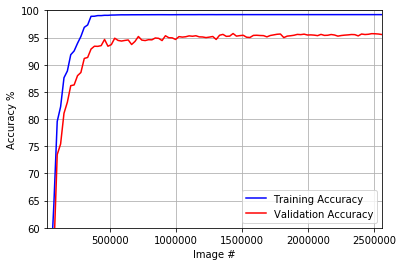


Model saved.

Test Accuracy = 95.637%


In [11]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

from sklearn.utils import shuffle

""" Hyper parameters """
EPOCHS = 50
BATCH_SIZE = 256
LEARN_RATE_START = 0.001
LEARN_DECAY_ITER = 100
LEARN_DECAY_PCT = 0.96
LOG_BATCH_STEP = BATCH_SIZE * 100

""" Learning rate decay """
global_step = tf.Variable(0, trainable=False)
learning_rate = tf.train.exponential_decay(LEARN_RATE_START, global_step,
                                           LEARN_DECAY_ITER, LEARN_DECAY_PCT, staircase=False)

""" Main network """
logits = DuffNet(x, keep_prob)

""" Tensor Flow model training operations """
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_operation = optimizer.minimize(loss_operation, global_step=global_step)

""" Tensor Flow model evaluation operations """
prediction = tf.nn.softmax(logits)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


""" Copy training data for processing by neural network """
X_train_data = np.copy(X_train_hist_norm)
y_train_data = np.copy(y_train)

""" Copy validation data for processing by neural network """
X_valid_data = np.copy(X_valid_hist_norm)
y_valid_data = np.copy(y_valid)

""" Copy test data for processing by neural network """
X_test_data = np.copy(X_test_hist_norm)
y_test_data = np.copy(y_test)


""" Train the Model """
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_data)
    
    # Measurements use for graphing loss and accuracy
    batches = []
    train_acc_batch = []
    valid_acc_batch = []

    # Start training cycles
    for i in range(EPOCHS):        
        X_train_data, y_train_data = shuffle(X_train_data, y_train_data)
        batches_pbar = tqdm(range(0, num_examples, BATCH_SIZE),
                            desc='Epoch {:>2}/{}'.format(i+1, EPOCHS), unit='batches')
        for offset in batches_pbar:
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_data[offset:end], y_train_data[offset:end]
            
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
            # Log batches
            if not offset % LOG_BATCH_STEP:
                train_accuracy = evaluate(X_train_data, y_train_data)
                validation_accuracy = evaluate(X_valid_data, y_valid_data)
                previous_batch = batches[-1] if batches else 0
                batches.append(LOG_BATCH_STEP + previous_batch)
                train_acc_batch.append(train_accuracy*100)
                valid_acc_batch.append(validation_accuracy*100)
            
        print("Learning Rate = {:.8f}".format(learning_rate.eval()))
        
        train_accuracy = evaluate(X_train_data, y_train_data)
        print("Training Accuracy = {:.3f}%".format(train_accuracy*100))

        validation_accuracy = evaluate(X_valid_data, y_valid_data)
        print("Validation Accuracy = {:.3f}%".format(validation_accuracy*100))
        
    # Plot learning curves
    acc_plot = plt.subplot()
    acc_plot.plot(batches, train_acc_batch, 'b-', label='Training Accuracy')
    acc_plot.plot(batches, valid_acc_batch, 'r-', label='Validation Accuracy')
    acc_plot.set_xlabel('Image #')
    acc_plot.set_xlim([batches[0], batches[-1]])
    acc_plot.set_ylabel('Accuracy %')
    acc_plot.set_ylim([60, 100])
    acc_plot.legend(loc=4)
    acc_plot.grid(True)
    plt.show()
    
    # Save model result
    saver.save(sess, './duffnet')
    print("\nModel saved.")

    
""" Evaluate the model with Test data set """
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_test_data, y_test_data)
    print("\nTest Accuracy = {:.3f}%".format(test_accuracy*100))

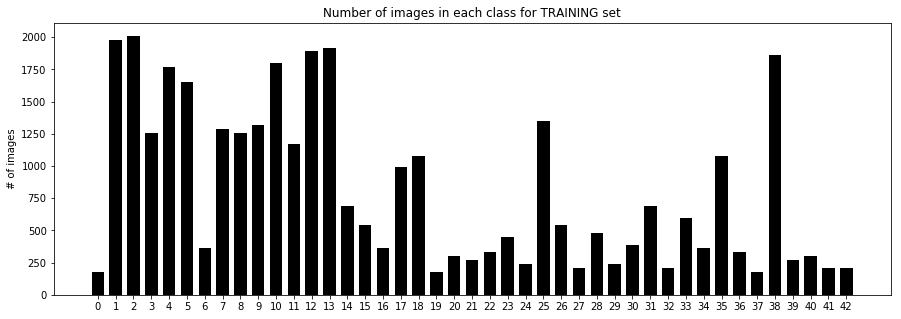

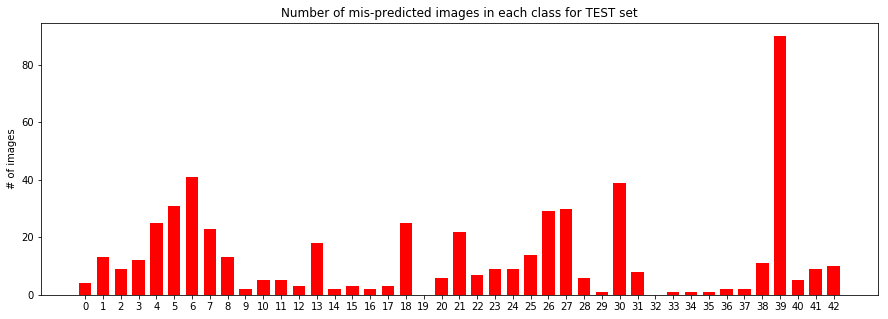

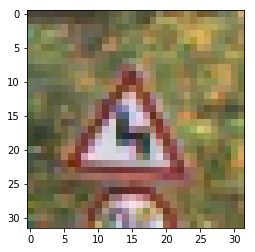

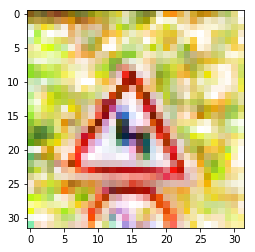

Predicted: Speed limit (50km/h)
Actual: Double curve



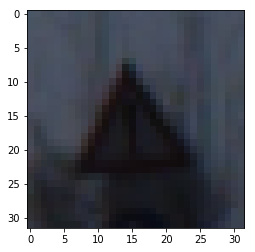

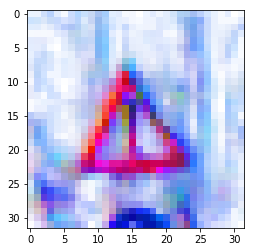

Predicted: Wild animals crossing
Actual: General caution



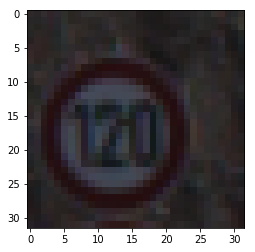

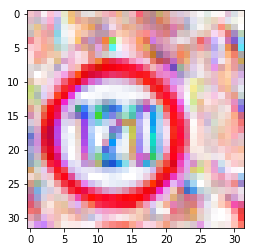

Predicted: Speed limit (30km/h)
Actual: Speed limit (120km/h)



In [12]:
### Check frequency of mis-predicted test images and visualize some

N_EXAMPLES = 3

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_predictions = sess.run(prediction, feed_dict={x: X_test_data, y: y_test_data, keep_prob: 1.0})
    test_correct = sess.run(correct_prediction, feed_dict={x: X_test_data, y: y_test_data, keep_prob: 1.0})
    miss_idx = np.where(test_correct == False)
    miss_idx = miss_idx[0]
    
    # Make bar graph of sign class frequencies in training set
    fig, ax1 = plt.subplots(figsize=(15, 5))
    bincount_train = np.bincount(y_train)
    x_pos = np.arange(n_classes)
    ax1.bar(x_pos, bincount_train, 0.7, color='k')
    ax1.set_title('Number of images in each class for TRAINING set')
    ax1.set_xticks(np.arange(0, n_classes))
    ax1.set_ylabel('# of images')
    plt.show()

    # Make bar graph of mis-predicted sign class frequencies in test set
    fig, ax2 = plt.subplots(figsize=(15, 5))
    bincount_train = np.bincount(y_test_data[miss_idx])
    x_pos = np.arange(n_classes)
    ax2.bar(x_pos, bincount_train, 0.7, color='r')
    ax2.set_title('Number of mis-predicted images in each class for TEST set')
    ax2.set_xticks(np.arange(0, n_classes))
    ax2.set_ylabel('# of images')
    plt.show()
    
    print("\n=====================================================================")
    for i in range(N_EXAMPLES):
        img_idx = miss_idx[i]
        plt.imshow(X_test[img_idx])
        plt.show()
        plt.imshow(X_test_hist[img_idx])
        plt.show()
        print("Predicted: {}".format(sign_names[test_predictions[img_idx].argmax()]))
        print("Actual: {}".format(sign_names[y_test_data[img_idx]]))
        print("\n=====================================================================")

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

Loading sign images from the web...

Keep right:


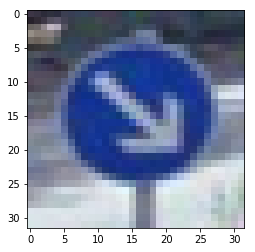


Go straight or right:


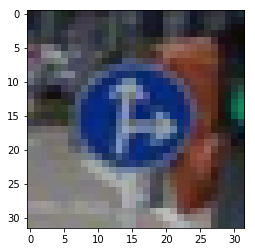


Road work:


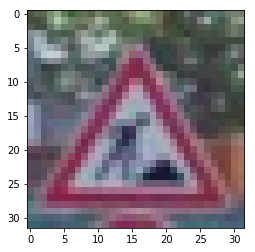


Priority road:


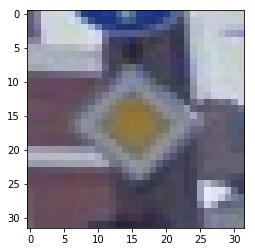


Speed limit (30km/h):


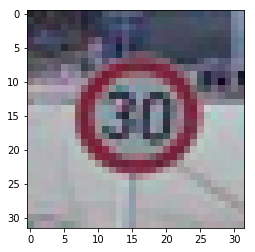

Normalize: 100%|██████████| 5/5 [00:00<00:00, 7487.15it/s]


In [13]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import matplotlib.image as mpimg

""" Define web image files and set their sign classes """
webimage_dir = "./web_signs/"
webimage_dict = {'websign01.jpg': 38,
                 'websign02.jpg': 25,
                 'websign03.jpg': 12,
                 'websign04.jpg': 36,
                 'websign05.jpg': 1}

""" Load and visualize web images """
print("Loading sign images from the web...")
X_web = np.empty(shape=(len(webimage_dict), 32, 32, 3), dtype=np.uint8)
y_web = np.empty(shape=(len(webimage_dict)), dtype=np.int32)

i = 0
for img_name, img_class in webimage_dict.items():
    image = mpimg.imread(webimage_dir + img_name)
    print('\n{}:'.format(sign_names[img_class]))
    plt.imshow(image)
    plt.show()
    X_web[i] = image
    y_web[i] = img_class
    i += 1

""" Pre-process web images """
X_web_hist = adaptive_hist_HLS(X_web)
X_web_hist_norm = normalize_image(X_web_hist)

### Predict the Sign Type for Each Image

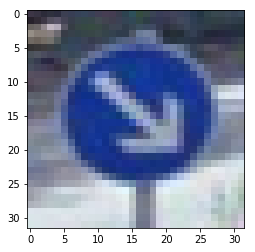

Prediction = Keep right
Actual = Keep right



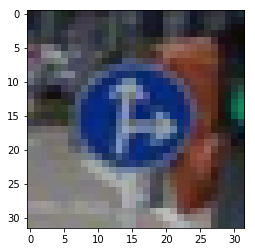

Prediction = Turn right ahead
Actual = Go straight or right



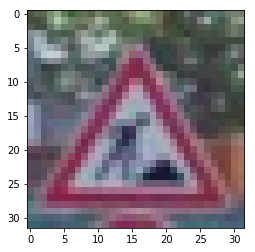

Prediction = Road work
Actual = Road work



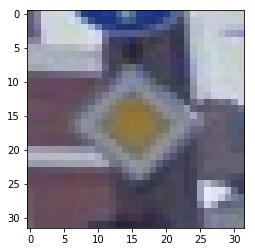

Prediction = Priority road
Actual = Priority road



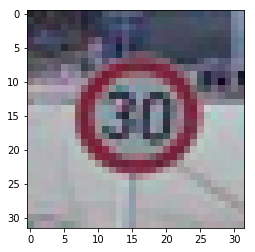

Prediction = Speed limit (30km/h)
Actual = Speed limit (30km/h)



In [15]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

""" Copy web image data for processing by neural network """
X_web_data = np.copy(X_web_hist_norm)
y_web_data = np.copy(y_web)

""" Evaluate the Model with Web images"""
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    predicted_output = sess.run(prediction, feed_dict={x: X_web_data, y: y_web_data, keep_prob: 1.0})
    
    print("\n=====================================================================")
    for i in range(len(X_web)):
        plt.imshow(X_web[i])
        plt.show()
        print("Prediction = {}".format(sign_names[predicted_output[i].argmax()]))
        print("Actual = {}".format(sign_names[y_web[i]]))
        print("\n=====================================================================")

### Analyze Performance

In [16]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

""" Calculate accuracy of web image predictions """
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_web_data, y_web_data)
    print("Total Accuracy = {:.0f}%".format(test_accuracy*100))

Total Accuracy = 80%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

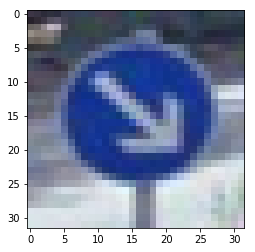

Actual: Keep right

Predictions:


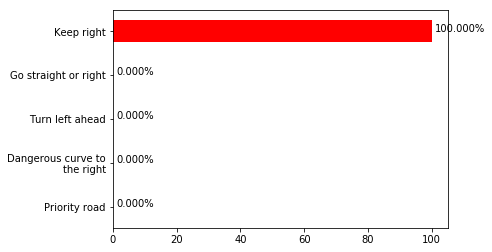

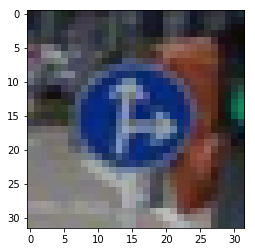

Actual: Go straight or right

Predictions:


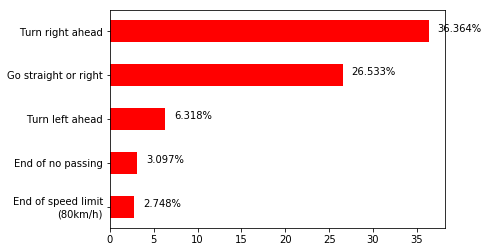

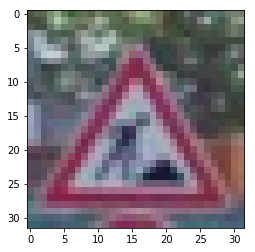

Actual: Road work

Predictions:


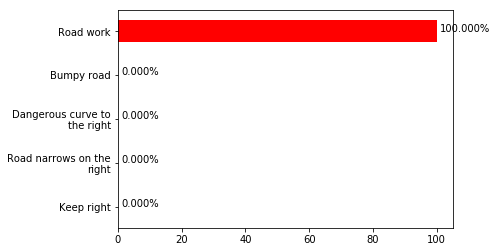

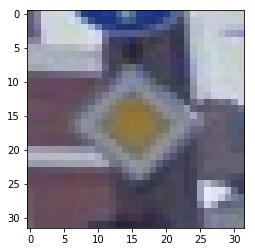

Actual: Priority road

Predictions:


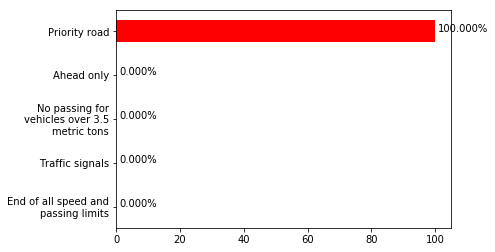

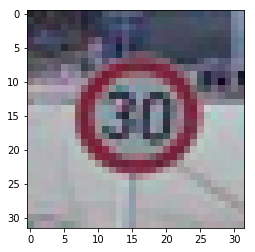

Actual: Speed limit (30km/h)

Predictions:


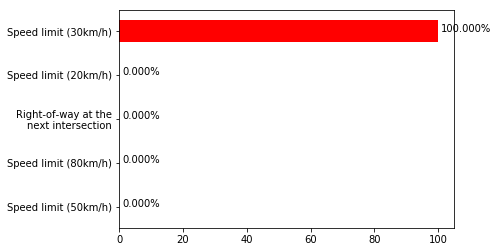

In [17]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

from textwrap import wrap

""" Get top k=5 softmax probabilities for web images and visualize vs actual sign class """
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    top_k_output = sess.run(tf.nn.top_k(predicted_output, k=5))
    
    print("\n=====================================================================")
    for i in range(len(top_k_output.values)):
        plt.imshow(X_web[i])
        plt.show()
        print("Actual: {}\n".format(sign_names[y_web[i]]))
        
        print("Predictions:")
        labels = []
        pred_values = []
        for j in range(len(top_k_output.values[i])):
            class_id = top_k_output.indices[i,j]
            labels.append(sign_names[class_id])
            confidence_val = top_k_output.values[i,j]*100
            pred_values.append(confidence_val)
            #print("{:.3f}% : {}".format(confidence_val, sign_names[class_id]))
           
        # Plot bar chart of top five softmax probabilities
        fig, ax = plt.subplots()
        pos = np.arange(5)
        width = 0.5
        labels = ['\n'.join(wrap(label, 20)) for label in labels] # wrap label text
        ax.barh(pos, top_k_output.values[i]*100, width, color='r', tick_label=labels)
        plt.gca().invert_yaxis()
        for i, val in enumerate(pred_values):
            ax.text(val + 1, i, "{:.3f}%".format(val)) # add data labels to bars
        plt.show()
        print("\n=====================================================================")

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


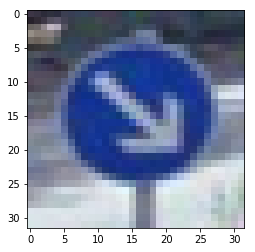

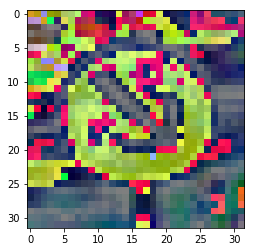

Features from 1st Convolution Activation


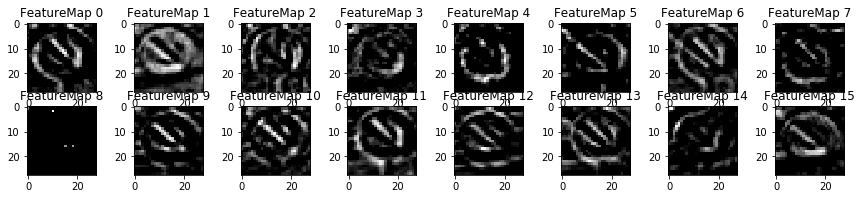

Features from 2nd Convolution Activation


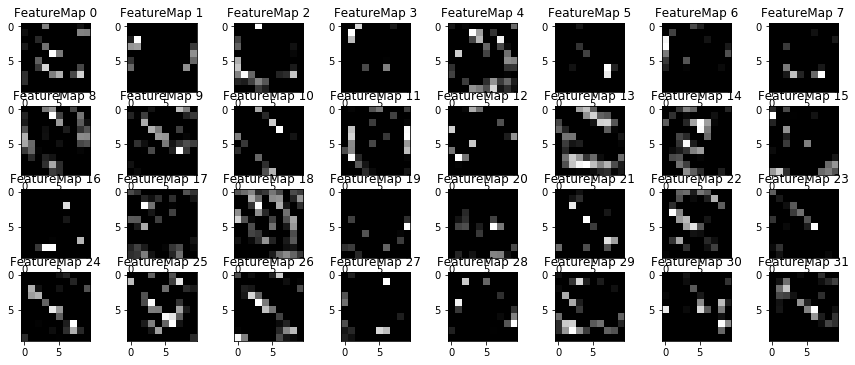

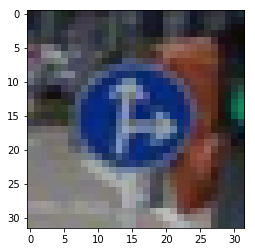

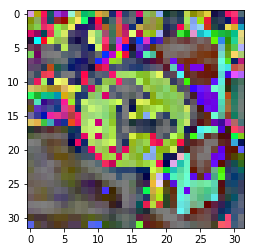

Features from 1st Convolution Activation


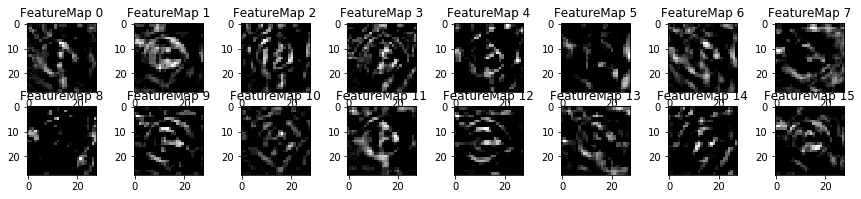

Features from 2nd Convolution Activation


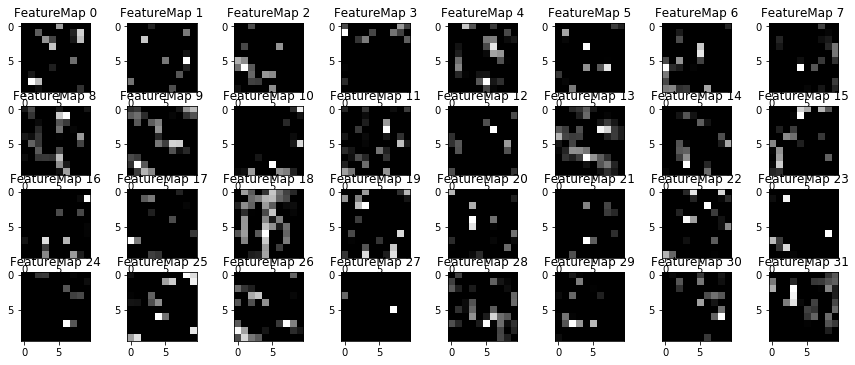

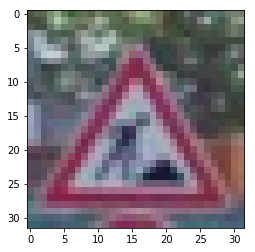

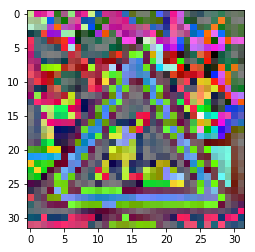

Features from 1st Convolution Activation


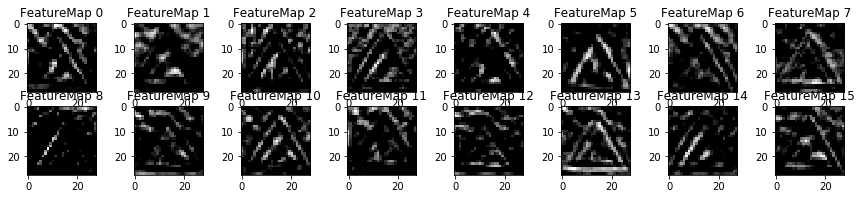

Features from 2nd Convolution Activation


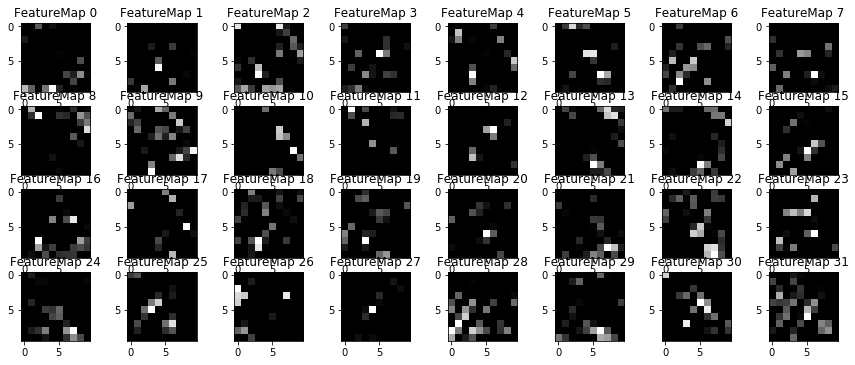

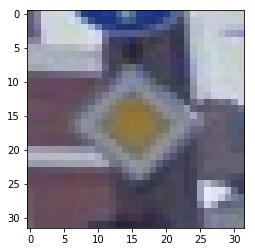

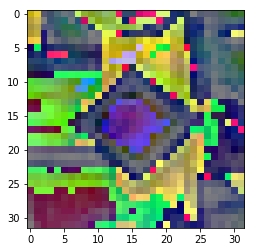

Features from 1st Convolution Activation


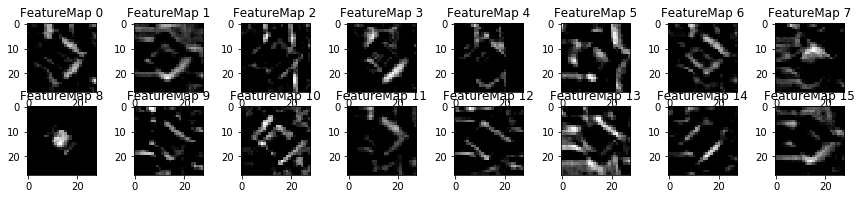

Features from 2nd Convolution Activation


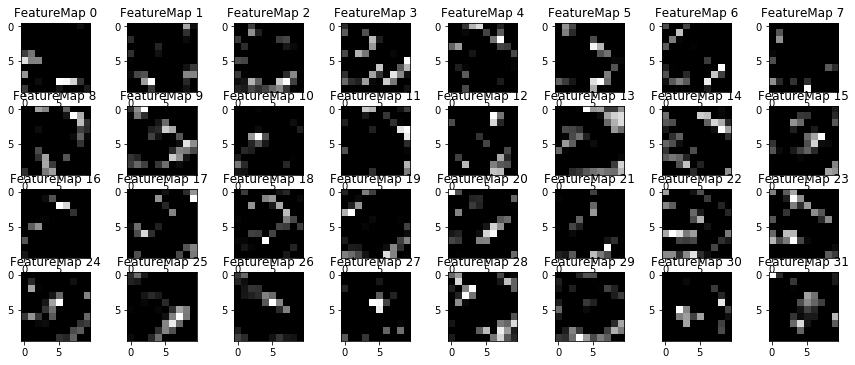

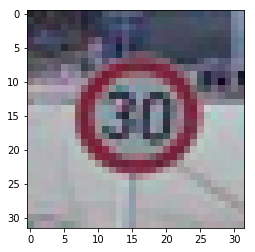

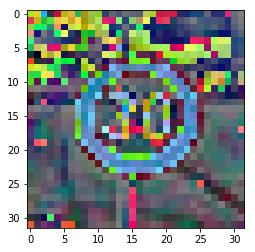

Features from 1st Convolution Activation


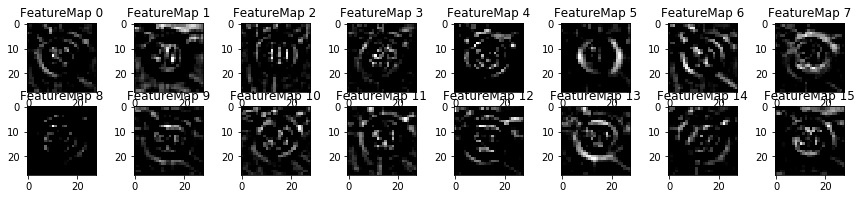

Features from 2nd Convolution Activation


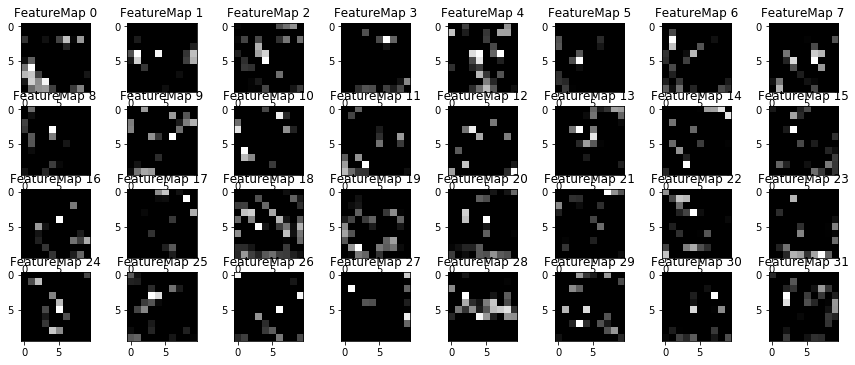

In [18]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(10,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

""" Visualize CNN's for each web image """
for i in range(len(X_web)):
    print("\n=====================================================================")
    plt.imshow(X_web[i])
    plt.show()

    viz_image = np.empty(shape=(1, 32, 32, 3), dtype=np.float)
    viz_image[0] = X_web_data[i]
    plt.imshow(viz_image[0])
    plt.show()

    with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('.'))
    
        print("Features from 1st Convolution Activation")
        outputFeatureMap(viz_image, conv1, plt_num=16)
        plt.show()
    
        print("Features from 2nd Convolution Activation")
        outputFeatureMap(viz_image, conv2, plt_num=32)
        plt.show()